# Import Library

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress info and warning messages

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import (
    Sequential,
    Model
)
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import (
    Dense,
    LeakyReLU,
    Dropout,
    BatchNormalization,
    Reshape,
    Flatten,
    Input, 
    Embedding, 
    multiply,
    Concatenate
)
from tensorflow.keras.optimizers import Adam

# 1. Preprocessing Dataset

In [3]:
iot_data = pd.read_csv('../Dataset/iot23_combinednew.csv')

iot_data

,Unnamed: 0,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,...,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_S0,conn_state_S1,conn_state_S3,conn_state_SF
0,0,5.005154,78.0,0.0,0.0,2.0,134.0,0.0,0.0,Benign,...,1,0,0,0,0,0,1,0,0,0
1,1,0.002246,90.0,90.0,0.0,2.0,146.0,2.0,146.0,Benign,...,1,0,0,0,0,0,0,0,0,1
2,2,5.005157,78.0,0.0,0.0,2.0,134.0,0.0,0.0,Benign,...,1,0,0,0,0,0,1,0,0,0
3,3,0.001999,90.0,90.0,0.0,2.0,146.0,2.0,146.0,Benign,...,1,0,0,0,0,0,0,0,0,1
4,4,5.001404,78.0,0.0,0.0,2.0,134.0,0.0,0.0,Benign,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126342,99994,NaN,NaN,NaN,0.0,6.0,360.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,0,0,0,1,0,0,0
126343,99995,NaN,NaN,NaN,0.0,6.0,360.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,0,0,0,1,0,0,0
126344,99996,NaN,NaN,NaN,0.0,6.0,360.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,0,0,0,1,0,0,0
126345,99997,NaN,NaN,NaN,0.0,6.0,360.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,0,0,0,1,0,0,0


In [4]:
# Menghapus kolom 'Unnamed: 0'
iot_data = iot_data.drop(columns=['Unnamed: 0'])

iot_data

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_S0,conn_state_S1,conn_state_S3,conn_state_SF
0,5.005154,78.0,0.0,0.0,2.0,134.0,0.0,0.0,Benign,0,...,1,0,0,0,0,0,1,0,0,0
1,0.002246,90.0,90.0,0.0,2.0,146.0,2.0,146.0,Benign,0,...,1,0,0,0,0,0,0,0,0,1
2,5.005157,78.0,0.0,0.0,2.0,134.0,0.0,0.0,Benign,0,...,1,0,0,0,0,0,1,0,0,0
3,0.001999,90.0,90.0,0.0,2.0,146.0,2.0,146.0,Benign,0,...,1,0,0,0,0,0,0,0,0,1
4,5.001404,78.0,0.0,0.0,2.0,134.0,0.0,0.0,Benign,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126342,NaN,NaN,NaN,0.0,6.0,360.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,0,0,0,1,0,0,0
126343,NaN,NaN,NaN,0.0,6.0,360.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,0,0,0,1,0,0,0
126344,NaN,NaN,NaN,0.0,6.0,360.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,0,0,0,1,0,0,0
126345,NaN,NaN,NaN,0.0,6.0,360.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
# Menampilkan kolom
print("Kolom:", iot_data.columns.tolist())

Kolom: ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_S0', 'conn_state_S1', 'conn_state_S3', 'conn_state_SF']


In [6]:
# tampilkan ada label apa aja dari kolom label
unique_labels = iot_data["label"].unique()
print(unique_labels)

['Benign' 'C&C-Torii' 'C&C' 'PartOfAHorizontalPortScan' 'DDoS'
 'C&C-HeartBeat-FileDownload' 'Attack']


In [7]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126347 entries, 0 to 126346
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   duration           26348 non-null   float64
 1   orig_bytes         26348 non-null   float64
 2   resp_bytes         26348 non-null   float64
 3   missed_bytes       126347 non-null  float64
 4   orig_pkts          126347 non-null  float64
 5   orig_ip_bytes      126347 non-null  float64
 6   resp_pkts          126347 non-null  float64
 7   resp_ip_bytes      126347 non-null  float64
 8   label              126347 non-null  object 
 9   proto_icmp         126347 non-null  int64  
 10  proto_tcp          126347 non-null  int64  
 11  proto_udp          126347 non-null  int64  
 12  conn_state_OTH     126347 non-null  int64  
 13  conn_state_REJ     126347 non-null  int64  
 14  conn_state_RSTO    126347 non-null  int64  
 15  conn_state_RSTOS0  126347 non-null  int64  
 16  co

In [8]:
iot_data.isna().sum()

duration             99999
orig_bytes           99999
resp_bytes           99999
missed_bytes             0
orig_pkts                0
orig_ip_bytes            0
resp_pkts                0
resp_ip_bytes            0
label                    0
proto_icmp               0
proto_tcp                0
proto_udp                0
conn_state_OTH           0
conn_state_REJ           0
conn_state_RSTO          0
conn_state_RSTOS0        0
conn_state_RSTR          0
conn_state_S0            0
conn_state_S1            0
conn_state_S3            0
conn_state_SF            0
dtype: int64

In [9]:
iot_data.nunique()

duration             5744
orig_bytes             39
resp_bytes             53
missed_bytes            6
orig_pkts              67
orig_ip_bytes         142
resp_pkts              44
resp_ip_bytes          92
label                   7
proto_icmp              2
proto_tcp               2
proto_udp               2
conn_state_OTH          2
conn_state_REJ          2
conn_state_RSTO         2
conn_state_RSTOS0       2
conn_state_RSTR         2
conn_state_S0           2
conn_state_S1           2
conn_state_S3           2
conn_state_SF           2
dtype: int64

In [10]:
iot_data[["duration", "orig_bytes", "resp_bytes"]] = iot_data[
    ["duration", "orig_bytes", "resp_bytes"]
].fillna(0)

In [11]:
iot_data.isna().sum()

duration             0
orig_bytes           0
resp_bytes           0
missed_bytes         0
orig_pkts            0
orig_ip_bytes        0
resp_pkts            0
resp_ip_bytes        0
label                0
proto_icmp           0
proto_tcp            0
proto_udp            0
conn_state_OTH       0
conn_state_REJ       0
conn_state_RSTO      0
conn_state_RSTOS0    0
conn_state_RSTR      0
conn_state_S0        0
conn_state_S1        0
conn_state_S3        0
conn_state_SF        0
dtype: int64

In [12]:
iot_data.tail(5)

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_S0,conn_state_S1,conn_state_S3,conn_state_SF
126342,0.0,0.0,0.0,0.0,6.0,360.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,0,0,0,1,0,0,0
126343,0.0,0.0,0.0,0.0,6.0,360.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,0,0,0,1,0,0,0
126344,0.0,0.0,0.0,0.0,6.0,360.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,0,0,0,1,0,0,0
126345,0.0,0.0,0.0,0.0,6.0,360.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,0,0,0,1,0,0,0
126346,0.0,0.0,0.0,0.0,6.0,360.0,0.0,0.0,PartOfAHorizontalPortScan,0,...,0,0,0,0,0,0,1,0,0,0


In [13]:
# Melihat distribusi missing values di antara label
print(iot_data[iot_data["duration"].isna()]["label"].value_counts())

Series([], Name: label, dtype: int64)


PartOfAHorizontalPortScan     99892
DDoS                          14394
C&C                            6706
Benign                         5230
Attack                          101
C&C-Torii                        16
C&C-HeartBeat-FileDownload        8
Name: label, dtype: int64


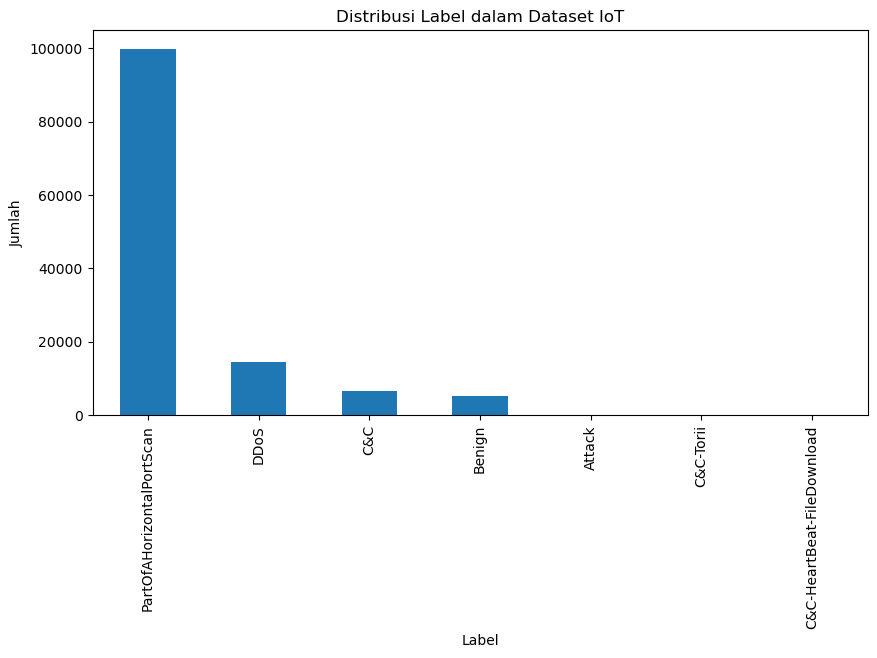

In [14]:
import matplotlib.pyplot as plt

label_counts = iot_data["label"].value_counts()
print(label_counts)

# Visualisasi distribusi label
plt.figure(figsize=(10, 5))
label_counts.plot(kind="bar")
plt.title("Distribusi Label dalam Dataset IoT")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()

### Convert Label to Numeric and Normalisasi Fitur

In [15]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Define columns that need normalization
numerical_features = [
    "duration",
    "orig_bytes",
    "resp_bytes",
    "missed_bytes",
    "orig_pkts",
    "orig_ip_bytes",
    "resp_pkts",
    "resp_ip_bytes",
]

# Normalisasi fitur numerik
scaler = MinMaxScaler()
iot_data[numerical_features] = scaler.fit_transform(iot_data[numerical_features])

iot_data.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_S0,conn_state_S1,conn_state_S3,conn_state_SF
0,1.021943e-04,0.000001,0.000000,0.0,0.000108,0.000002,0.000000,0.000000,Benign,0,...,1,0,0,0,0,0,1,0,0,0
1,4.585843e-08,0.000001,0.000548,0.0,0.000108,0.000002,0.000215,0.000375,Benign,0,...,1,0,0,0,0,0,0,0,0,1
2,1.021944e-04,0.000001,0.000000,0.0,0.000108,0.000002,0.000000,0.000000,Benign,0,...,1,0,0,0,0,0,1,0,0,0
3,4.081523e-08,0.000001,0.000548,0.0,0.000108,0.000002,0.000215,0.000375,Benign,0,...,1,0,0,0,0,0,0,0,0,1
4,1.021178e-04,0.000001,0.000000,0.0,0.000108,0.000002,0.000000,0.000000,Benign,0,...,1,0,0,0,0,0,1,0,0,0


In [16]:
# Mapping semua label ke angka
label_mapping_full = {
    "PartOfAHorizontalPortScan": 0,
    "DDoS": 1,
    "C&C": 2,
    "Benign": 3,
    "Attack": 4,
    "C&C-Torii": 5,
    "C&C-HeartBeat-FileDownload": 6,
}

# Tambahkan kolom baru untuk label numerik
iot_data["numeric_label"] = iot_data["label"].map(label_mapping_full)

In [17]:
# Encoding label menjadi numerik
##label_encoder = LabelEncoder()
#iot_data["label"] = label_encoder.fit_transform(iot_data["label"])

In [18]:
iot_data

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_S0,conn_state_S1,conn_state_S3,conn_state_SF,numeric_label
0,1.021943e-04,0.000001,0.000000,0.0,0.000108,0.000002,0.000000,0.000000,Benign,0,...,0,0,0,0,0,1,0,0,0,3
1,4.585843e-08,0.000001,0.000548,0.0,0.000108,0.000002,0.000215,0.000375,Benign,0,...,0,0,0,0,0,0,0,0,1,3
2,1.021944e-04,0.000001,0.000000,0.0,0.000108,0.000002,0.000000,0.000000,Benign,0,...,0,0,0,0,0,1,0,0,0,3
3,4.081523e-08,0.000001,0.000548,0.0,0.000108,0.000002,0.000215,0.000375,Benign,0,...,0,0,0,0,0,0,0,0,1,3
4,1.021178e-04,0.000001,0.000000,0.0,0.000108,0.000002,0.000000,0.000000,Benign,0,...,0,0,0,0,0,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126342,0.000000e+00,0.000000,0.000000,0.0,0.000325,0.000005,0.000000,0.000000,PartOfAHorizontalPortScan,0,...,0,0,0,0,0,1,0,0,0,0
126343,0.000000e+00,0.000000,0.000000,0.0,0.000325,0.000005,0.000000,0.000000,PartOfAHorizontalPortScan,0,...,0,0,0,0,0,1,0,0,0,0
126344,0.000000e+00,0.000000,0.000000,0.0,0.000325,0.000005,0.000000,0.000000,PartOfAHorizontalPortScan,0,...,0,0,0,0,0,1,0,0,0,0
126345,0.000000e+00,0.000000,0.000000,0.0,0.000325,0.000005,0.000000,0.000000,PartOfAHorizontalPortScan,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
iot_data["numeric_label"]

0         3
1         3
2         3
3         3
4         3
         ..
126342    0
126343    0
126344    0
126345    0
126346    0
Name: numeric_label, Length: 126347, dtype: int64

# Oversampling dengan Conditional GAN (cGAN)

Oversampling dengan Conditional GAN (cGAN) melibatkan pelatihan GAN dengan label tertentu sehingga generator menghasilkan data baru untuk setiap kelas yang ingin kita tambahkan sampelnya.


In [20]:
# Model Generator
def build_generator(latent_dim, num_classes, feature_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(feature_dim, activation='tanh'))
    
    noise = Input(shape=(latent_dim,))
    label = Input(shape=(1,), dtype='int32')
    label_embedding = Flatten()(Embedding(num_classes, latent_dim)(label))
    input = multiply([noise, label_embedding])
    
    generated_data = model(input)
    
    return Model([noise, label], generated_data)



# Model Discriminator
def build_discriminator(num_classes, feature_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=feature_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    data = Input(shape=(feature_dim,))
    label = Input(shape=(1,), dtype='int32')
    label_embedding = Flatten()(Embedding(num_classes, feature_dim)(label))
    input = multiply([data, label_embedding])
    
    validity = model(input)
    
    return Model([data, label], validity)


In [21]:
latent_dim = 100
num_classes = 7  # Adjust based on your unique labels
feature_dim = len(numerical_features)

# Build and compile discriminator
discriminator = build_discriminator(num_classes, feature_dim)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Build generator
generator = build_generator(latent_dim, num_classes, feature_dim)

# Create the cGAN model (Generator + Discriminator)
z = Input(shape=(latent_dim,))
label = Input(shape=(1,))
generated_data = generator([z, label])
validity = discriminator([generated_data, label])

# Combined model (Generator + Discriminator)
cgan = Model([z, label], validity)
cgan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))


In [22]:
# Filter data for minority classes (numeric_label = 4, 5, 6)
minority_data = iot_data[iot_data["numeric_label"].isin([4, 5, 6])]
X_minority = minority_data[numerical_features].values
y_minority = minority_data["numeric_label"].values

# Training parameters
epochs = 10000
batch_size = 64

for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, X_minority.shape[0], batch_size)
    real_data = X_minority[idx]
    real_labels = y_minority[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    random_labels = np.random.randint(0, num_classes, batch_size)
    
    fake_data = generator.predict([noise, random_labels])
    fake_validity = np.zeros((batch_size, 1))
    real_validity = np.ones((batch_size, 1))
    
    d_loss_real = discriminator.train_on_batch([real_data, real_labels], real_validity)
    d_loss_fake = discriminator.train_on_batch([fake_data, random_labels], fake_validity)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    sampled_labels = np.random.randint(0, num_classes, batch_size)
    valid_y = np.ones((batch_size, 1))
    
    g_loss = cgan.train_on_batch([noise, sampled_labels], valid_y)
    
    # Logging the losses
    if epoch % 1000 == 0:
        print(f"{epoch}: [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")


2/2 [==============================] - 0s 2ms/step
0: [D loss: 0.6938711404800415, acc.: 18.75] [G loss: 0.6941311359405518]
2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 1ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step
1000: [D loss: 0.8122209757566452, acc.: 50.0] [G loss: 0.31109511852264404]
2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step
2000: [D loss: 0.815985195338726, acc.: 50.0] [G loss: 0.3223603367805481]
2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step
3000: [D loss: 0.8119979202747345, acc.: 51.5625] [G loss: 0.3118782639503479]
2/2 [==============================] - 0s 1ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 5ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step
4000: [D loss: 0.8143605142831802, acc.: 50.78125] [G loss: 0.32350027561187744]
2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 1ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step
5000: [D loss: 0.8782504349946976, acc.: 50.0] [G loss: 0.31921514868736267]
2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 1ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step
6000: [D loss: 0.8353754729032516, acc.: 53.125] [G loss: 0.4331810474395752]
2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 1ms/step


2/2 [==============================] - 0s 2ms/step
7000: [D loss: 0.8514315634965897, acc.: 50.0] [G loss: 1.3674366474151611]
2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 1ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step
8000: [D loss: 0.6901850402355194, acc.: 56.25] [G loss: 0.44894248247146606]
2/2 [==============================] - 0s 1ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 1ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step
9000: [D loss: 0.9173543304204941, acc.: 52.34375] [G loss: 0.48029714822769165]
2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


2/2 [==============================] - 0s 2ms/step


In [23]:
# Mapping semua label ke angka
label_mapping_full = {
    0: "PartOfAHorizontalPortScan",
    1: "DDoS",
    2: "C&C",
    3: "Benign",
    4: "Attack",
    5: "C&C-Torii",
    6: "C&C-HeartBeat-FileDownload",
}

# List of classes for which to generate data (using names)
classes_to_generate = [label_mapping_full[2], label_mapping_full[3], label_mapping_full[4], label_mapping_full[5], label_mapping_full[6]]

In [24]:
def generate_synthetic_data(generator, num_samples, class_label, latent_dim):
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    labels = np.full((num_samples, 1), class_label)
    synthetic_data = generator.predict([noise, labels])
    return synthetic_data

In [25]:
# Function to generate synthetic data for specified classes using class names
def generate_multiple_classes(generator, num_samples, class_names, label_mapping, latent_dim):
    synthetic_data_dict = {}
    
    for class_name in class_names:
        # Get the numeric label from the mapping
        class_label = next(key for key, value in label_mapping.items() if value == class_name)
        synthetic_samples = generate_synthetic_data(generator, num_samples, class_label, latent_dim)
        synthetic_data_dict[class_name] = synthetic_samples
    
    return synthetic_data_dict

# Generate 5000 samples for each specified class using class names
synthetic_data_samples = generate_multiple_classes(generator, 50000, classes_to_generate, label_mapping_full, latent_dim)

1563/1563 [==============================] - 1s 685us/step


In [26]:
# Create an empty DataFrame to hold all synthetic data
synthetic_df = pd.DataFrame()

# Loop through the generated samples and create DataFrames for each class
for class_name, samples in synthetic_data_samples.items():
    # Convert to DataFrame
    class_df = pd.DataFrame(samples, columns=numerical_features)
    class_df['label'] = class_name  # Assign the class name label
    class_df['numeric_label'] = list(label_mapping_full.keys())[list(label_mapping_full.values()).index(class_name)]
    synthetic_df = pd.concat([synthetic_df, class_df], ignore_index=True)

# Append synthetic data to the original dataset
balanced_iot_data = pd.concat([iot_data, synthetic_df], ignore_index=True)

# Check the shape of the new balanced dataset
print(balanced_iot_data.shape)


(376347, 22)


In [27]:
balanced_iot_data

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_S0,conn_state_S1,conn_state_S3,conn_state_SF,numeric_label
0,1.021943e-04,0.000001,0.000000,0.000000,0.000108,0.000002,0.000000,0.000000,Benign,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
1,4.585843e-08,0.000001,0.000548,0.000000,0.000108,0.000002,0.000215,0.000375,Benign,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
2,1.021944e-04,0.000001,0.000000,0.000000,0.000108,0.000002,0.000000,0.000000,Benign,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
3,4.081523e-08,0.000001,0.000548,0.000000,0.000108,0.000002,0.000215,0.000375,Benign,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
4,1.021178e-04,0.000001,0.000000,0.000000,0.000108,0.000002,0.000000,0.000000,Benign,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376342,-8.308760e-03,-0.002414,-0.004859,-0.005334,0.011234,0.004577,0.005838,-0.000085,C&C-HeartBeat-FileDownload,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
376343,-8.358694e-03,-0.002774,-0.004186,-0.005640,0.011694,0.005506,0.006204,0.001458,C&C-HeartBeat-FileDownload,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
376344,-8.991079e-03,-0.002282,-0.005049,-0.006384,0.011537,0.005385,0.004635,0.001265,C&C-HeartBeat-FileDownload,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
376345,-8.424897e-03,-0.002082,-0.003271,-0.004796,0.010422,0.004149,0.008781,-0.000096,C&C-HeartBeat-FileDownload,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


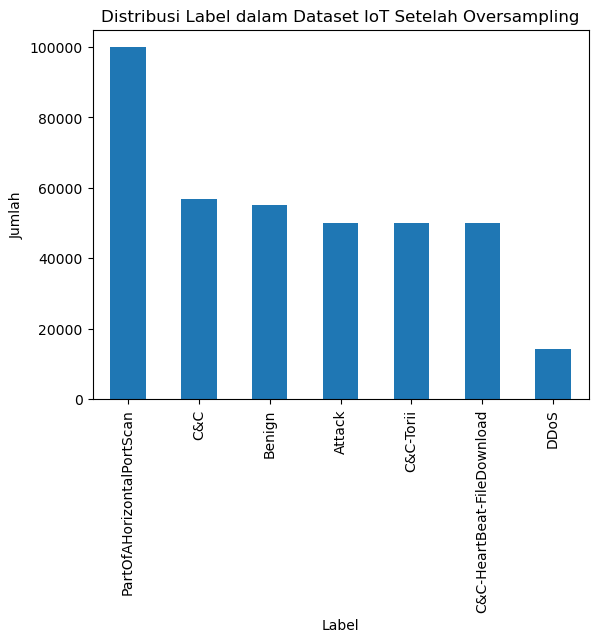

In [28]:
balanced_label_counts = balanced_iot_data["label"].value_counts()
balanced_label_counts.plot(kind="bar")
plt.title("Distribusi Label dalam Dataset IoT Setelah Oversampling")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()


In [29]:
balanced_iot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376347 entries, 0 to 376346
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   duration           376347 non-null  float64
 1   orig_bytes         376347 non-null  float64
 2   resp_bytes         376347 non-null  float64
 3   missed_bytes       376347 non-null  float64
 4   orig_pkts          376347 non-null  float64
 5   orig_ip_bytes      376347 non-null  float64
 6   resp_pkts          376347 non-null  float64
 7   resp_ip_bytes      376347 non-null  float64
 8   label              376347 non-null  object 
 9   proto_icmp         126347 non-null  float64
 10  proto_tcp          126347 non-null  float64
 11  proto_udp          126347 non-null  float64
 12  conn_state_OTH     126347 non-null  float64
 13  conn_state_REJ     126347 non-null  float64
 14  conn_state_RSTO    126347 non-null  float64
 15  conn_state_RSTOS0  126347 non-null  float64
 16  co

In [30]:
balanced_iot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376347 entries, 0 to 376346
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   duration           376347 non-null  float64
 1   orig_bytes         376347 non-null  float64
 2   resp_bytes         376347 non-null  float64
 3   missed_bytes       376347 non-null  float64
 4   orig_pkts          376347 non-null  float64
 5   orig_ip_bytes      376347 non-null  float64
 6   resp_pkts          376347 non-null  float64
 7   resp_ip_bytes      376347 non-null  float64
 8   label              376347 non-null  object 
 9   proto_icmp         126347 non-null  float64
 10  proto_tcp          126347 non-null  float64
 11  proto_udp          126347 non-null  float64
 12  conn_state_OTH     126347 non-null  float64
 13  conn_state_REJ     126347 non-null  float64
 14  conn_state_RSTO    126347 non-null  float64
 15  conn_state_RSTOS0  126347 non-null  float64
 16  co

# Split the Dataset

In [31]:
# Define features and target variable
X = balanced_iot_data[numerical_features].values
# Ensure we are using the numeric labels column
y = balanced_iot_data["numeric_label"].astype(int).values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Convert y_train and y_test to integers explicitly
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [32]:
def build_classifier(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))  # Use softmax for multi-class classification
    return model

# Build the classifier
classifier = build_classifier(X_train.shape[1], len(label_mapping_full))
classifier.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
classifier.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
3294/3294 [==============================] - 4s 1ms/step - loss: 0.8916 - accuracy: 0.5913 - val_loss: 0.8753 - val_accuracy: 0.5879
Epoch 2/100
3294/3294 [==============================] - 4s 1ms/step - loss: 0.8885 - accuracy: 0.5938 - val_loss: 0.8833 - val_accuracy: 0.5876
Epoch 3/100
3294/3294 [==============================] - 4s 1ms/step - loss: 0.8870 - accuracy: 0.5974 - val_loss: 0.8576 - val_accuracy: 0.5881
Epoch 4/100
3294/3294 [==============================] - 4s 1ms/step - loss: 0.8845 - accuracy: 0.5987 - val_loss: 0.8649 - val_accuracy: 0.5815
Epoch 5/100
3294/3294 [==============================] - 4s 1ms/step - loss: 0.8914 - accuracy: 0.6003 - val_loss: 0.8592 - val_accuracy: 0.5868
Epoch 6/100
3294/3294 [==============================] - 4s 1ms/step - loss: 0.8844 - accuracy: 0.6004 - val_loss: 0.8487 - val_accuracy: 0.6360
Epoch 7/100
3294/3294 [==============================] - 4s 1ms/step - loss: 0.8757 - accuracy: 0.6028 - val_loss: 0.8496 - val_ac

In [34]:
test_loss, test_accuracy = classifier.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

3529/3529 [==============================] - 3s 745us/step - loss: 0.9152 - accuracy: 0.5860
Test Accuracy: 58.60%


In [35]:
predictions = classifier.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)  # Get the class with the highest probability

3529/3529 [==============================] - 2s 598us/step


In [36]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predicted_classes))
print(classification_report(y_test, predicted_classes, target_names=list(label_mapping_full.values())))


[[29968     0     0     0     0     0     0]
 [ 4317     0     0     0     0     1     0]
 [ 1497     0  2299  3478  2839     0  6899]
 [  649     1  1732  5298  2411     0  6478]
 [    1    26  1100  3147  3146     0  7610]
 [    6     1     4     0     0 14994     0]
 [    0     0   294  2035  2210     5 10459]]
                            precision    recall  f1-score   support

 PartOfAHorizontalPortScan       0.82      1.00      0.90     29968
                      DDoS       0.00      0.00      0.00      4318
                       C&C       0.42      0.14      0.20     17012
                    Benign       0.38      0.32      0.35     16569
                    Attack       0.30      0.21      0.25     15030
                 C&C-Torii       1.00      1.00      1.00     15005
C&C-HeartBeat-FileDownload       0.33      0.70      0.45     15003

                  accuracy                           0.59    112905
                 macro avg       0.46      0.48      0.45    112905
  

In [37]:
# Calculate F2-score with average macro and weighted
from sklearn.metrics import fbeta_score
f2_macro = fbeta_score(y_test, predicted_classes, average='macro', beta=2)
f2_weighted = fbeta_score(y_test, predicted_classes, average='weighted', beta=2)

print(f"F2 Score (Macro): {f2_macro:.2f}")
print(f"F2 Score (Weighted): {f2_weighted:.2f}")


F2 Score (Macro): 0.46
F2 Score (Weighted): 0.56


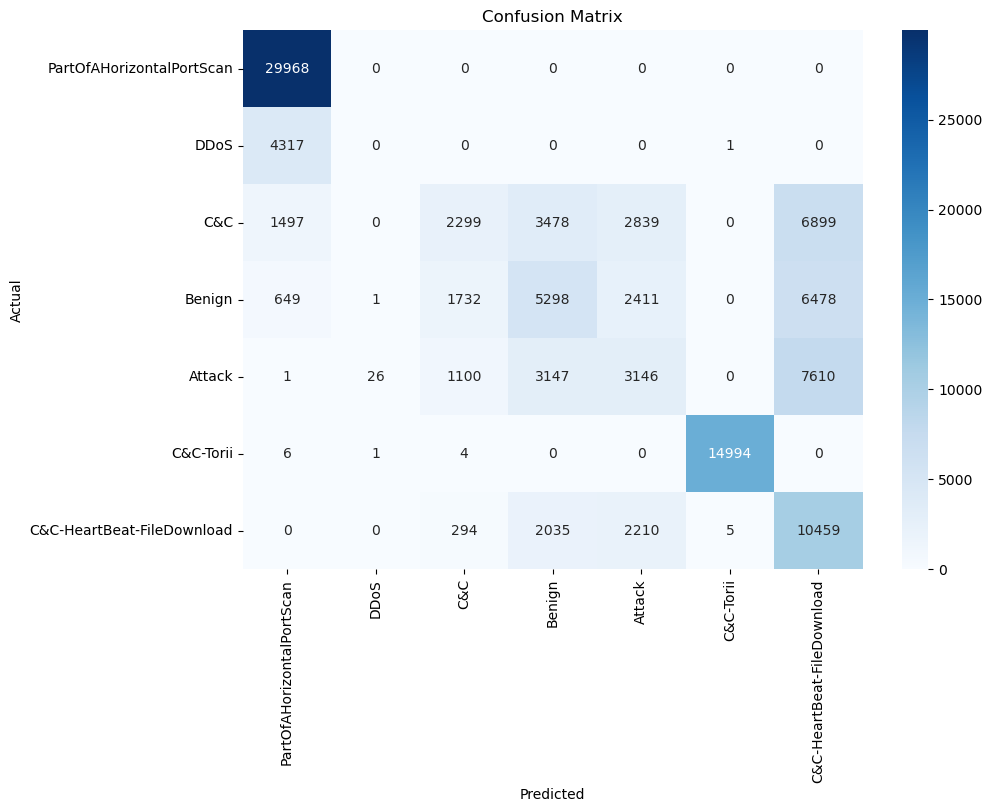

In [38]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, predicted_classes), annot=True, fmt='d', cmap='Blues', xticklabels=list(label_mapping_full.values()), yticklabels=list(label_mapping_full.values()))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
